# Plotting Tools

In this lecture, we will try three different plotting packages that are readily available on [Anaconda](https://anaconda.org). These are
1. matplotlib
2. bokeh
3. seaborn

We shall also use some financial data from [Quandl](https://www.quandl.com/). Anaconda also has a package with the same name. Quandl also stores the data set that Thomas Piketty has used in his book _Capital in the Twenty-First Century_. Let's get some data. How about "Capital Share in Rich Countries, 1970-2010." The code for this  data set on Quandl is **PIKETTY/TS6_3**.

For more information on various data available you can visit: https://www.quandl.com/data/PIKETTY

Note that using Quandl in the classroom creates problems with respect to the number of queries one can make. For this reason, we use csv files of the mentioned datasets. You can use Quandl by commenting out the necessary parts. 

In [3]:
#import quandl
#mydata = quandl.get("PIKETTY/TS6_3")
import pandas as pd
import numpy as np
mydata=pd.read_csv('PIKETTY-TS6_3.csv', index_col=0)
mydata.index = pd.to_datetime(mydata.index)
type(mydata)

pandas.core.frame.DataFrame

So Quandl returns the data as a pandas data frame. This makes it easy to work with the data.

In [4]:
mydata.head()

,U.S.,Japan,Germany,France,U.K.,Italy,Canada,Australia,Europe
Year,,,,,,,,,
2010-12-31,28.927795,27.034886,30.969196,24.775889,26.580999,28.569753,26.013087,27.015861,27.723959
2009-12-31,26.155199,25.600891,28.854584,23.744211,30.316542,28.123296,24.406295,28.014141,27.759658
2008-12-31,24.073979,27.520832,32.110877,25.038930,30.045088,29.996308,30.623308,25.179902,29.297801
2007-12-31,25.815302,30.341817,34.250491,24.854867,28.673319,32.274280,30.137103,24.286613,30.013239
2006-12-31,27.215151,28.883907,33.227610,24.003227,28.647060,31.963235,30.494127,25.029536,29.460283


Pandas uses the matplotlib package for plotting the columns.

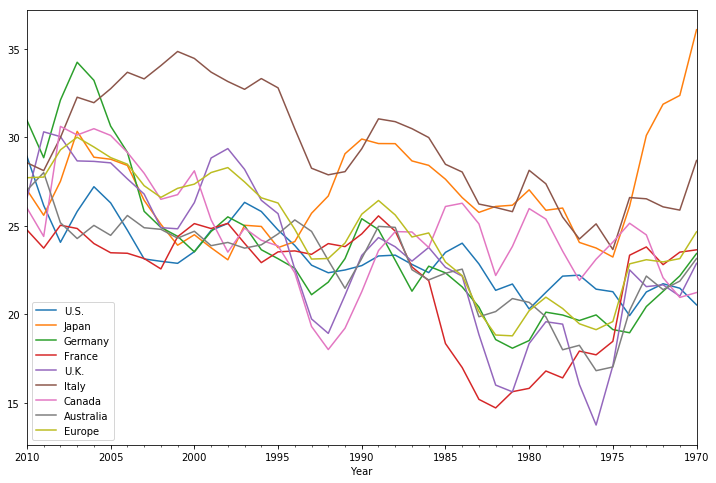

In [5]:
%matplotlib inline
mydata.plot(figsize=(12,8))

We can make this plot more pretty by using the seaborn package.

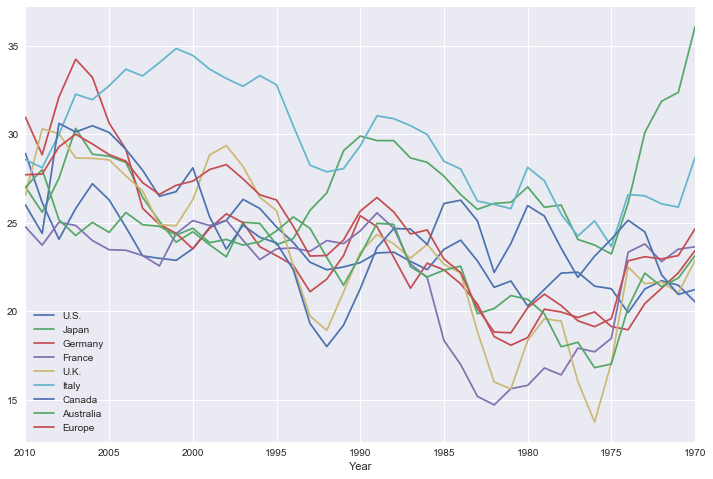

In [6]:
import seaborn as sns
mydata.plot(figsize=(12,8))

With seaborn, the plot is immediately improved. This is because the seaborn package is based on matplotlib. We can now try bokeh, which does not rely on matplotlib. The main idea is to have a plot with interactive features so that the plot can be easily used in a browser.

In [7]:
from bokeh.plotting import show
from bokeh.io import output_notebook
from bokeh.charts import Line

output_notebook()
p = Line(mydata, legend='bottom_right')
p.width = 900
p.height = 600
show(p)

Loading BokehJS ...

This plot is only shown in the notebook. We can direct the output to an HTML file. This will open up a new tab in your browser. Notice also in the above figure that the years in the x-axis are not properly parsed. This is a bug in Bokeh that will be fixed in the coming days. Instead we can plot the lines ourselves and specify the type of the x-axis.

In [14]:
from bokeh.plotting import figure
from bokeh.palettes import RdYlBu11
from bokeh.plotting import show, output_file, reset_output

output_file("bokehplot.html")

mytools = ['pan', 'box_zoom','resize', 'wheel_zoom', 'reset'] # Does not allow save and question options
p = figure(width = 800, height = 600, tools = mytools, x_axis_type="datetime")
cols = mydata.columns.values[:-1]
print cols
mypalette=RdYlBu11[0:len(cols)]
print mypalette
dates = mydata.index.values
print dates
for indx, col in enumerate(cols):
    p.line(dates, mydata[col], color=mypalette[indx], line_width=3, legend = col)

show(p)
reset_output()

INFO:bokeh.core.state:Session output file 'bokehplot.html' already exists, will be overwritten.


['U.S.' 'Japan' 'Germany' 'France' 'U.K.' 'Italy' 'Canada' 'Australia']
['#313695', '#4575b4', '#74add1', '#abd9e9', '#e0f3f8', '#ffffbf', '#fee090', '#fdae61']
['2010-12-31T00:00:00.000000000' '2009-12-31T00:00:00.000000000'
 '2008-12-31T00:00:00.000000000' '2007-12-31T00:00:00.000000000'
 '2006-12-31T00:00:00.000000000' '2005-12-31T00:00:00.000000000'
 '2004-12-31T00:00:00.000000000' '2003-12-31T00:00:00.000000000'
 '2002-12-31T00:00:00.000000000' '2001-12-31T00:00:00.000000000'
 '2000-12-31T00:00:00.000000000' '1999-12-31T00:00:00.000000000'
 '1998-12-31T00:00:00.000000000' '1997-12-31T00:00:00.000000000'
 '1996-12-31T00:00:00.000000000' '1995-12-31T00:00:00.000000000'
 '1994-12-31T00:00:00.000000000' '1993-12-31T00:00:00.000000000'
 '1992-12-31T00:00:00.000000000' '1991-12-31T00:00:00.000000000'
 '1990-12-31T00:00:00.000000000' '1989-12-31T00:00:00.000000000'
 '1988-12-31T00:00:00.000000000' '1987-12-31T00:00:00.000000000'
 '1986-12-31T00:00:00.000000000' '1985-12-31T00:00:00.00000

Now let us look at two datasets on the same topic: top income share. In this we are going to investigate the share of the income of 1% highest earning part of the population in various countries. We use data **PIKETTY/TS9_3** for Canada, Australia and so on; and we use **PIKETTY/TS9_5** for India, South Africa and so on. First let us load and preview data.

In [7]:
#mydata = quandl.get("PIKETTY/TS9_3")
#mydata1 = quandl.get("PIKETTY/TS9_5")
mydata = pd.read_csv('PIKETTY-TS9_3.csv', index_col=0)
mydata.index = pd.to_datetime(mydata.index)

mydata1 = pd.read_csv('PIKETTY-TS9_5.csv', index_col=0)
mydata1.index = pd.to_datetime(mydata1.index)

print (mydata.head())
print (mydata1.head())

            Canada: Top 1%  Canada: Top 0.1%  Australia: Top 1%  \
Yaer                                                              
2010-12-31           12.30              4.37                NaN   
2009-12-31           12.30              4.37              9.215   
2008-12-31           13.06              4.91              8.590   
2007-12-31           13.72              5.34              9.840   
2006-12-31           13.72              5.38             10.060   

            Australia: Top 0.1%  New Zealand: Top 1%  New Zealand: 0.1%  \
Yaer                                                                      
2010-12-31                  NaN                  NaN                NaN   
2009-12-31                3.245                 8.22                NaN   
2008-12-31                2.910                 8.89                NaN   
2007-12-31                3.580                 8.54                NaN   
2006-12-31                3.650                 8.89                NaN   

    

We are going to take top 1% in our comparaison (HINT: '0.1' is not in the column name) and merge the two dataframes. What type of merge operation do we need? Now we should joing these dataframes. First let us see the columns and indices. 

In [8]:
for col in mydata.columns:
    if '0.1' in col:
        mydata.drop(col,axis=1,inplace=True)
for col in mydata1.columns:
    if '0.1' in col:
        mydata1.drop(col,axis=1,inplace=True) 
        
print mydata.columns
print mydata1.columns
print mydata.index
print mydata1.index


Index([u'Canada: Top 1%', u'Australia: Top 1%', u'New Zealand: Top 1%',
       u'Denmark: 1%', u'Italy: Top 1%', u'Holland: Top 1%', u'Spain: Top 1%'],
      dtype='object')
Index([u'India: Top 1%', u'S.A.: Top 1%', u'Indonesia: Top 1%',
       u'Argentina: Top 1%', u'China: Top 1%', u'Colombia: Top 1%'],
      dtype='object')
DatetimeIndex(['2010-12-31', '2009-12-31', '2008-12-31', '2007-12-31',
               '2006-12-31', '2005-12-31', '2004-12-31', '2003-12-31',
               '2002-12-31', '2001-12-31', '2000-12-31', '1999-12-31',
               '1998-12-31', '1997-12-31', '1996-12-31', '1995-12-31',
               '1994-12-31', '1993-12-31', '1992-12-31', '1991-12-31',
               '1990-12-31', '1989-12-31', '1988-12-31', '1987-12-31',
               '1986-12-31', '1985-12-31', '1984-12-31', '1983-12-31',
               '1982-12-31', '1981-12-31', '1980-12-31', '1979-12-31',
               '1978-12-31', '1977-12-31', '1976-12-31', '1975-12-31',
               '1974-12-31', '19

We are going to compare 'Denmark', 'Italy', 'Holland', 'Spain', 'India', 'S.A.'. We should join these two data frames based on index (year). We are going to carry a full join (outer join) because missing values should still be present in the dataframe.

In [9]:
result = mydata.join(mydata1, how='outer')
print np.shape(result)
cols = []
for col in result.columns:
    col = col.replace(': Top 1%','')
    col = col.replace(': 1%','')
    cols.append(col)
    
result.columns = cols

print result.head()
for i in result.columns:
    print i

(101, 13)
            Canada  Australia  New Zealand  Denmark  Italy  Holland  Spain  \
1903-12-31     NaN        NaN          NaN   16.210    NaN      NaN    NaN   
1908-12-31     NaN        NaN          NaN   16.450    NaN      NaN    NaN   
1910-12-31     NaN        NaN          NaN   19.985    NaN      NaN    NaN   
1913-12-31     NaN        NaN          NaN      NaN    NaN      NaN    NaN   
1914-12-31     NaN        NaN          NaN      NaN    NaN    20.96    NaN   

            India   S.A.  Indonesia  Argentina  China  Colombia  
1903-12-31    NaN    NaN        NaN        NaN    NaN       NaN  
1908-12-31    NaN    NaN        NaN        NaN    NaN       NaN  
1910-12-31    NaN    NaN        NaN        NaN    NaN       NaN  
1913-12-31    NaN    NaN        NaN        NaN    NaN       NaN  
1914-12-31    NaN  22.03        NaN        NaN    NaN       NaN  
Canada
Australia
New Zealand
Denmark
Italy
Holland
Spain
India
S.A.
Indonesia
Argentina
China
Colombia


Now that we joined the dataframes, we can draw the plots for countries of interest.

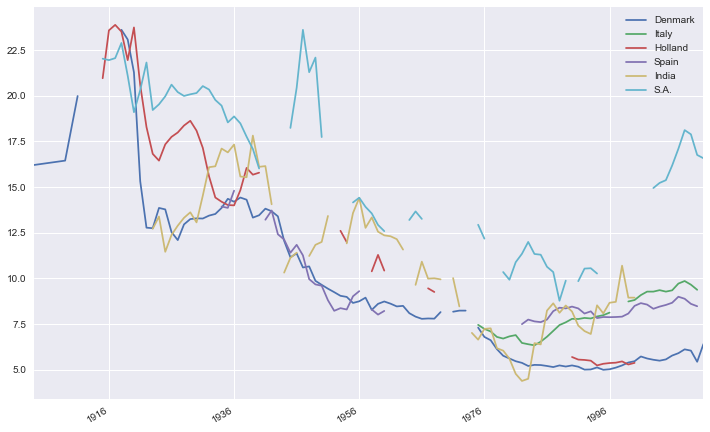

In [10]:
result[['Denmark', 'Italy', 'Holland', 'Spain', 'India', 'S.A.']].plot(figsize=(12,8))

Because of missing values the plots do not look nice. Let us use interpolate from pandas with different methods for interpolation.

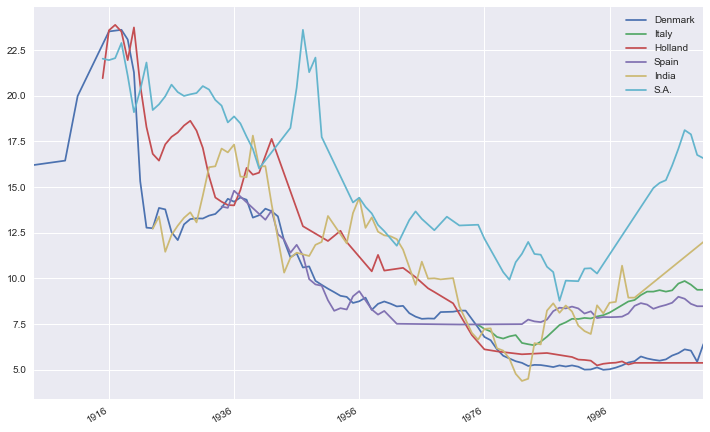

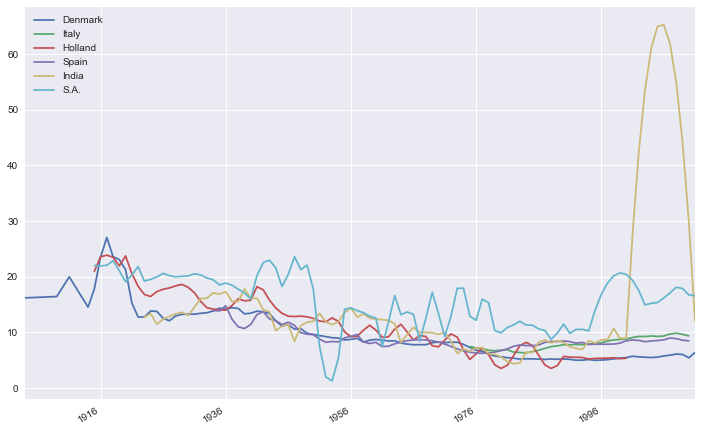

In [11]:
result[['Denmark', 'Italy', 'Holland', 'Spain', 'India', 'S.A.', ]].interpolate(method='time').plot(figsize=(12,8))
result[['Denmark', 'Italy', 'Holland', 'Spain', 'India', 'S.A.', ]].interpolate(method='polynomial', order = 2).plot(figsize=(12,8))

Now it looks much better. Which interpolation is better?

Next, we can play around with another data set that also involves categorical data. This is a data set about some used cars.

In [12]:
import pandas as pd

usedcars = pd.read_csv("usedcars.csv")
usedcars.head()

,year,model,price,mileage,color,transmission
0,2011,SEL,21992,7413,Yellow,AUTO
1,2011,SEL,20995,10926,Gray,AUTO
2,2011,SEL,19995,7351,Silver,AUTO
3,2011,SEL,17809,11613,Gray,AUTO
4,2012,SE,17500,8367,White,AUTO


Time for some scatter plots. First with Bokeh. Note that different colors are automatically assigned by giving the column name (_transmission_).

In [13]:
from bokeh.charts import Scatter

output_notebook()

p = Scatter(usedcars, x='mileage', y='price', color='transmission', 
            title="Mileage vs Price", xlabel="Mileage", ylabel="Price", legend='top_right')
p.width = 900
p.height = 300

show(p)

Loading BokehJS ...

If we want to have two plots side by side. Then, we fill them in one plot by the help of _hplot_ function.

Let us do it for mileage vs price and year vs price.

In [14]:
from bokeh.io import hplot

p1 = figure(width=450, plot_height=250, title=None)
p1.circle(usedcars.mileage, usedcars.price, size=10, color="navy", alpha=0.5)

p2 = figure(width=450, height=250, title=None)
p2.triangle(usedcars.year, usedcars.price, size=10, color="firebrick", alpha=0.5)

p = hplot(p1, p2)
show(p)

C:\Anaconda2\lib\site-packages\bokeh\util\deprecation.py:34: BokehDeprecationWarning: bokeh.io.hplot() was deprecated in Bokeh 0.12.0 and will be removed, use bokeh.models.layouts.Row instead.
  warn(message)


Seaborn has even a more impressive function called _FacetGrid_. By using this function, we can have multiple plots in a grid. The distribution to these grids are automatically done when we specify the column headings.

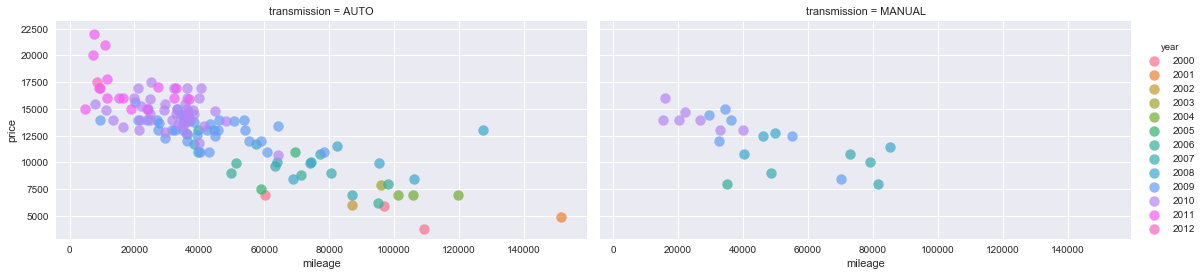

In [15]:
import matplotlib.pyplot as plt

g = sns.FacetGrid(usedcars, col="transmission", hue="year", size=4, aspect=2)
g.map(plt.scatter, "mileage", "price", s=100, alpha=.7)
g.add_legend()

Can you do the same using color of the car in order to color the dots? 

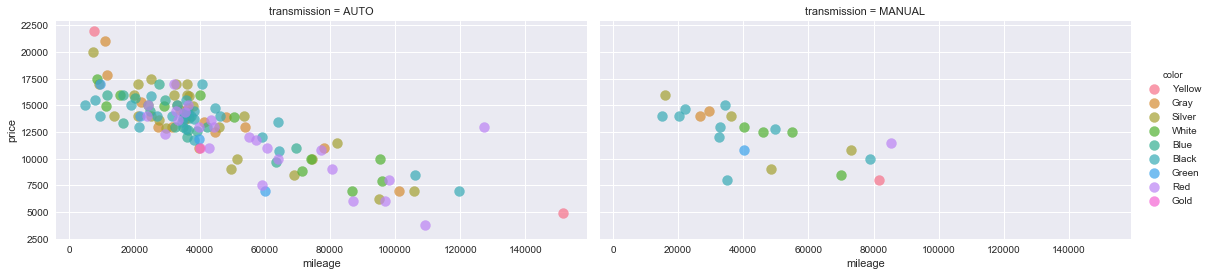

In [16]:
import matplotlib.pyplot as plt

g = sns.FacetGrid(usedcars, col="transmission", hue="color", size=4, aspect=2)
g.map(plt.scatter, "mileage", "price", s=100, alpha=.7)
g.add_legend()

We can further look into the set of used cars in terms of their colors. Note that each rows is automatically assigned to a different color.

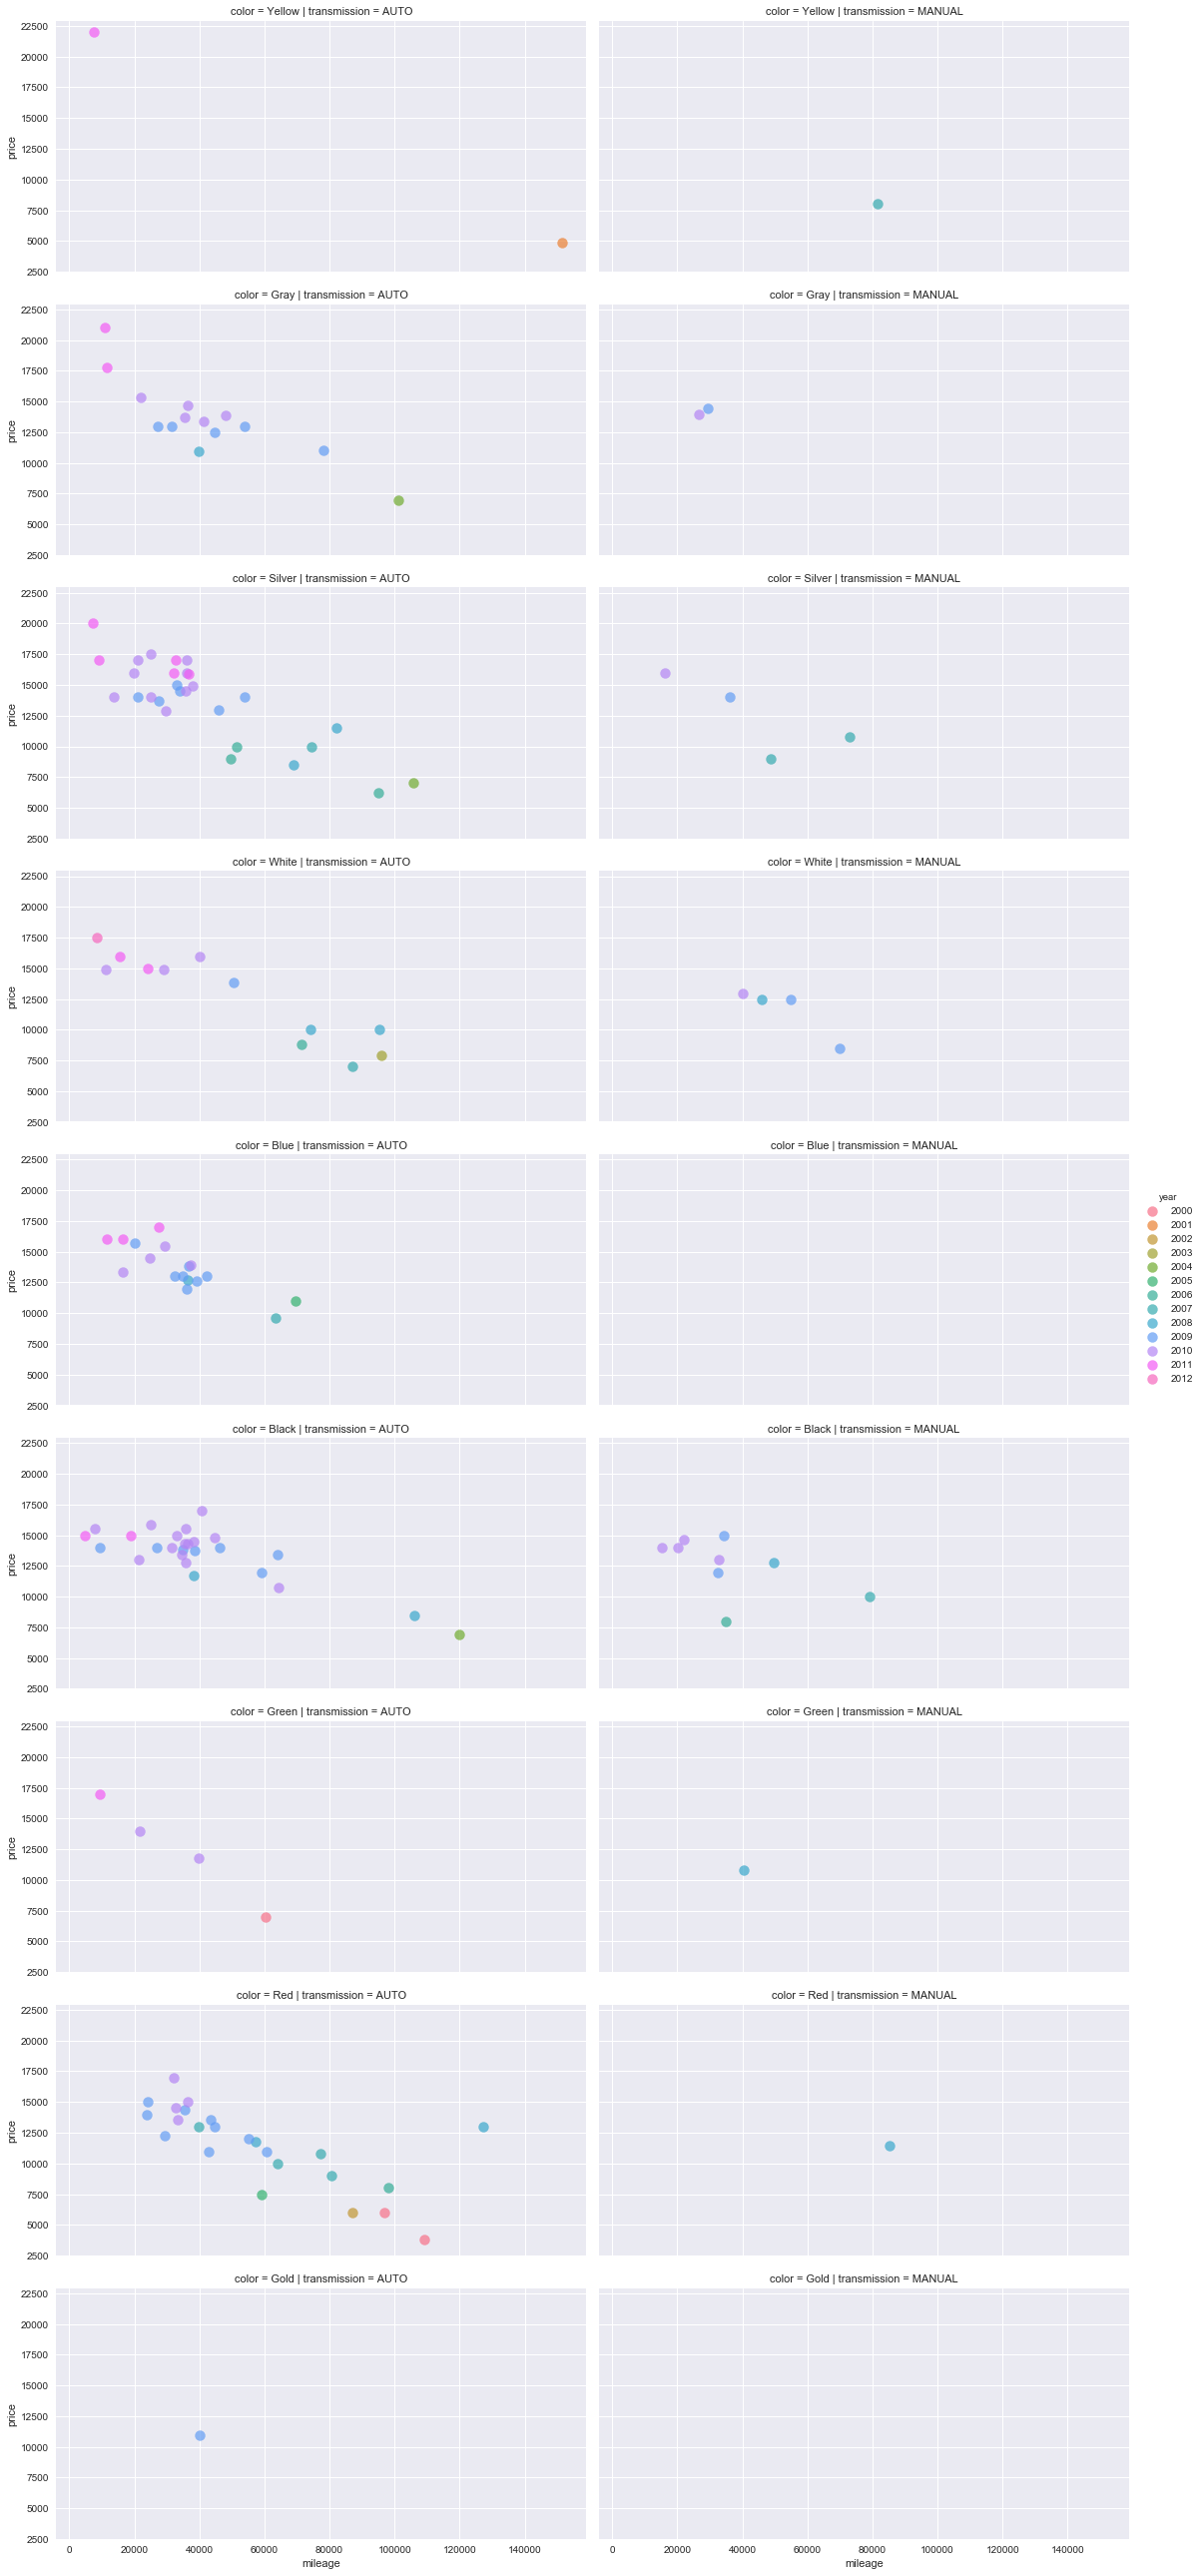

In [17]:
g = sns.FacetGrid(usedcars, col="transmission", row="color", hue="year", size=4, aspect=2)
g.map(plt.scatter, "mileage", "price", s=100, alpha=.7)
g.add_legend()